## Multiclass Classification


### Steps
* ### load data
* ### split the data into train and test
* ### build the network architecture
* ### compile the network
* ### train the network

In [8]:
!pip install tensorflow
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.1/230.1 MB 5.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.5 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 32.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.3/400.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 33.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 5.2 MB/s eta 0:00:00
  Created wheel for grpcio: filename=grpcio-1.54.2-cp310-cp310-macosx_11_0_x86_64.whl size=4816515 sha256=d5e95fca3396552604298e8c47e04ed7c915d7e091768edf1bc1b70953c78f55
  Stored in directory: /Users/petralinaru/Library/Caches/pip/wheels/e1/8f/42/1924dddc344a0b622bd4d50d30937a7e4292200622a3c998f5
  Created wheel for jax: filename=jax-0.4.10-py3-none-any.whl size=1480503 sha256=b22561965927447fe737608ab145de717aa1e0907ef7ec8926df4f769f369d79
  Stored in directory: /Users/petralinaru/Library/Caches/pip/wheels/2f/04/51/ebc9c5225f0a0df1e56c231c1f4c9b7afd3e024ebb492eed99
Successfully built grpcio jax
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.2
    Uninstalling urllib3-2.0.2:
      Successfully uninstalled urllib3-2.0.2

[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update,

2023-05-26 20:23:32.564196: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
DATASET_PATH="data.json"
def load_data(dataset_path):
    with open(dataset_path,"r") as fp:
        data = json.load(fp)
        
        #Convert list intp numpy arrays
        #Why? labels and mfccs are stored as lists, and we want them in numpy array
        inputs  = np.array(data['mfcc'])
        targets = np.array(data['labels'])
        
    return inputs,targets

if __name__=="__main__":
    #load data
    #Inputs is 3d: segments, 
    inputs,targets=load_data(DATASET_PATH)
    
    #split the data into train and test sets to check if it s trained correctly
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs,
                                                                              targets, 
                                                                              test_size=0.3)#30 % set, 70% train
    #build the network architecture
    model = keras.Sequential([
        #1 input layer, 3 hidden layers, 1 output layer
        # input layer flatten, multidimensional layer to be flattened
        keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])), #flatten these 2d arrays, because for a track we splitted it into segments and analyzed segments
        
        #1st hidden layer
        #how many neurons and what activation (relu)
        #relu reduces of prob of vanishing gradient
        #vanishing gradient??
        #propagating very small values so that at some point, they vanish
        keras.layers.Dense(512,activation="relu"),
        
        #2nd hidden layer
        keras.layers.Dense(256,activation="relu"),
        
        #3rd hidden layer
        keras.layers.Dense(64,activation="relu"),
        
        #output layer
        #10 neurons stand for 10 categories in our dataset entry
        #softmax is an activation function that helps us normalize the outputs(eg sum from the 10 neurons)
        keras.layers.Dense(10,activation="softmax")
             
        
    ])
    
    
    #compile the network
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer = optimizer,
                 loss = "sparse_categorical_crossentropy",
                 metrics=['accuracy']) #error function, multiclass
    #print the details about the architecture
    model.summary()
    
    
    #train network
    model.fit(inputs_train,targets_train,
              validation_data=(inputs_test,targets_test),
             epochs=50,
             batch_size=32) #batch size = mini batch , "best of the 2 worlds", not stochastic, not full 
    
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
219/219 [==========================

219/219 [==============================] - 2s 10ms/step - loss: 0.1722 - accuracy: 0.9415 - val_loss: 2.6314 - val_accuracy: 0.5695


We're done but after 50 epochs, the loss is 0.1722, accuracy is above 90% on the TRAINING SET,
BUT fails on test set (40% difference)
What we're doing ? We're overfitting ( our model does well on train, but fails when asking to predict on test)
*sad face*

## SOLVING OVERFITTING 

In [12]:
import matplotlib.pyplot as plt
def plot_history(history):
    #create 2 subplots
    fig,axs = plt.subplots(2)
    
    #create accuracy subplot
    axs[0].plot(history.history['accuracy'],label='train accuracy')
    axs[0].plot(history.history['val_accuracy'],label='test accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].legend(loc='lower right')
    axs[0].set_title("Accuracy eval")
    
    #create error subplot
    axs[1].plot(history.history['loss'],label='train loss')
    axs[1].plot(history.history['val_loss'],label='test loss')
    axs[1].set_ylabel('Error')
    axs[1].set_ylabel('Epoch')
    axs[1].legend(loc='upper right')
    axs[1].set_title("Error eval")
    
    plt.show()
    

Epoch 1/50
219/219 [==============================] - 2s 10ms/step - loss: 0.1699 - accuracy: 0.9411 - val_loss: 2.4862 - val_accuracy: 0.5725
Epoch 2/50
219/219 [==============================] - 2s 9ms/step - loss: 0.1712 - accuracy: 0.9417 - val_loss: 2.6389 - val_accuracy: 0.5815
Epoch 3/50
219/219 [==============================] - 2s 9ms/step - loss: 0.1510 - accuracy: 0.9488 - val_loss: 2.6126 - val_accuracy: 0.5689
Epoch 4/50
219/219 [==============================] - 2s 9ms/step - loss: 0.1557 - accuracy: 0.9471 - val_loss: 2.5279 - val_accuracy: 0.5705
Epoch 5/50
219/219 [==============================] - 2s 9ms/step - loss: 0.1444 - accuracy: 0.9500 - val_loss: 2.6694 - val_accuracy: 0.5882
Epoch 6/50
219/219 [==============================] - 2s 9ms/step - loss: 0.2417 - accuracy: 0.9227 - val_loss: 2.3264 - val_accuracy: 0.5632
Epoch 7/50
219/219 [==============================] - 2s 10ms/step - loss: 0.1584 - accuracy: 0.9478 - val_loss: 2.6478 - val_accuracy: 0.5852
Epoc

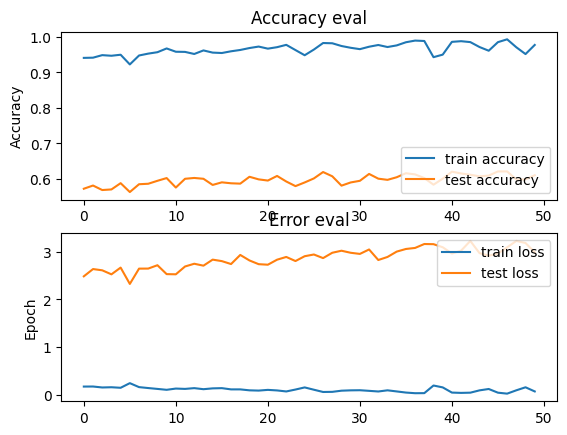

In [13]:
#that s history
history = model.fit(inputs_train,targets_train,
              validation_data=(inputs_test,targets_test),
             epochs=50,
             batch_size=32) #batch size = mini batch , "best of the 2 worlds", not stochastic, not full 

#plot accuracy and error over the epochs
plot_history(history)

Imporving the code:

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1690)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               865792    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)              

219/219 [==============================] - 2s 11ms/step - loss: 1.9801 - accuracy: 0.6257 - val_loss: 2.4255 - val_accuracy: 0.5055
Epoch 48/50
219/219 [==============================] - 2s 11ms/step - loss: 1.9367 - accuracy: 0.6297 - val_loss: 2.3618 - val_accuracy: 0.5225
Epoch 49/50
219/219 [==============================] - 3s 14ms/step - loss: 1.9085 - accuracy: 0.6308 - val_loss: 2.3580 - val_accuracy: 0.5178
Epoch 50/50
219/219 [==============================] - 2s 11ms/step - loss: 1.8760 - accuracy: 0.6390 - val_loss: 2.3565 - val_accuracy: 0.5285


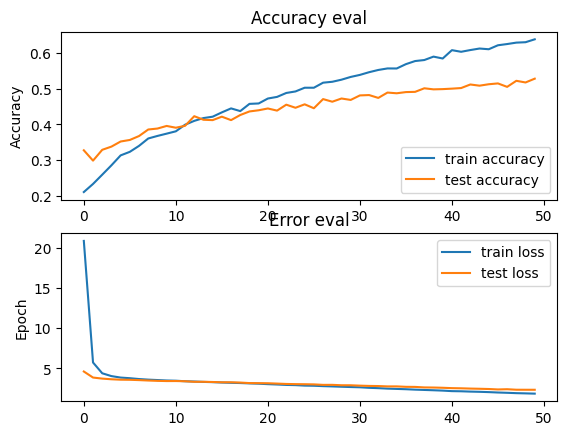

In [16]:
#update the architecture with dropout and regularization
model = keras.Sequential([
    #1 input layer, 3 hidden layers, 1 output layer
    # input layer flatten, multidimensional layer to be flattened
    keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])), #flatten these 2d arrays, because for a track we splitted it into segments and analyzed segments
        
    #1st hidden layer
    #how many neurons and what activation (relu)
    #relu reduces of prob of vanishing gradient
    #vanishing gradient??
    #propagating very small values so that at some point, they vanish
    keras.layers.Dense(512,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    #2nd hidden layer
    keras.layers.Dense(512,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    #3rd hidden layer
    keras.layers.Dense(512,activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),

    #output layer
    #10 neurons stand for 10 categories in our dataset entry
    #softmax is an activation function that helps us normalize the outputs(eg sum from the 10 neurons)
    keras.layers.Dense(10,activation="softmax")     
])

#compile the network

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer = optimizer,
             loss = "sparse_categorical_crossentropy",
             metrics=['accuracy']) #error function, multiclass

#print the details about the architecture
model.summary()


#train network
history2=model.fit(inputs_train,targets_train,
          validation_data=(inputs_test,targets_test),
         epochs=50,
         batch_size=32) #batch size = mini batch , "best of the 2 worlds", not stochastic, not full 
plot_history(history2)
